In [3]:
import matplotlib.pyplot as plt

In [6]:
dataset = [
    {'time': '13:30', 'bench': 1, 'people': 2},
    {'time': '14:00', 'bench': 1, 'people': 0},
    {'time': '14:30', 'bench': 1, 'people': 1},
    {'time': '15:00', 'bench': 1, 'people': 1},
    {'time': '15:30', 'bench': 1, 'people': 0},
]

In [101]:
import pandas as pd
import numpy as np

In [96]:
data = pd.read_csv('../../Downloads/park_data - %s.csv' % 'park', header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,1,1,2,0,0,0,1,1,1,1,1,1,1,1,1,1,4,0,0
1,0,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,3,3,3
2,0,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,3,3,3
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [105]:
def get_avg(key, day=True):

    if (not day) and (key in ['park_down', 'metropolis_top']):
            return None

    if day:
        data = pd.read_csv('../../Downloads/park_data - %s.csv' % key, header=None)
    else:
        data = pd.read_csv('../../Downloads/Парк и ТЦ - вечер  - %s.csv' % key, header=None)

    measures = len(data.columns)
    n_benches = len(data)
    vals = []

    for col in data.columns:
        column = data.loc[:, col]
        val = sum(column) / n_benches
        vals.append(val)

    avg_on_step = np.array(vals).mean()
    
#     if key in ['park_down', 'metropolis_top']:
#         factor = 4
#     else:
#         factor = 6

    return avg_on_step

In [94]:
# def get_avg(key, day=True):
    
#     if (not day) and (key in ['park_down', 'metropolis_top']):
#         return None
    
#     if day:
#         data = pd.read_csv('../../Downloads/park_data - %s.csv' % key, header=None)
#     else:
#         data = pd.read_csv('../../Downloads/Парк и ТЦ - вечер  - %s.csv' % key, header=None)
        
#     measures = len(data.columns)
#     n_benches = len(data)
    
#     if key in ['park_down', 'metropolis_top']:
#         factor = 4
#     else:
#         factor = 6
    
#     data['SUM'] = data.sum(1)
#     data['AVG'] = data['SUM']/n_benches
    
#     return sum(data['AVG'])*factor

In [106]:
get_avg('park', False)

0.23157894736842108

In [67]:
keys = ['park', 'park_down', 'metropolis_top', 'metropolis_down', 'metropolis_side']

In [107]:
for key in keys:
    for b in [True, False]:
        print(key, b, get_avg(key, b))
        
    print()

park True 0.6699999999999999
park False 0.23157894736842108

park_down True 0.8412698412698412
park_down False None

metropolis_top True 0.5
metropolis_top False None

metropolis_down True 0.5555555555555556
metropolis_down False 0.925925925925926

metropolis_side True 0.8499999999999999
metropolis_side False 0.2



In [35]:
def get_avg(i, day=True):
    if day:
        data = pd.read_csv('../../Downloads/park_data - Sheet%d.csv' % i, header=None)
    else:
        data = pd.read_csv('../../Downloads/Парк и ТЦ - вечер  - Лист%d.csv' % i, header=None)
        
        
    n = len(data.columns)
    
    data['SUM'] = data.sum(1)*6
    data['AVG'] = data['SUM']/n
    
    return sum(data['AVG'])

In [27]:
get_avg(1, day=False)

0    2.526316
1    1.894737
2    1.578947
3    0.000000
4    0.947368
Name: AVG, dtype: float64

In [19]:
get_avg(2)

0    0.888889
1    0.777778
2    0.666667
3    0.777778
4    0.111111
5    0.111111
Name: AVG, dtype: float64

In [20]:
get_avg(3)

0    0.625
1    0.625
2    0.750
3    0.750
4    1.500
Name: AVG, dtype: float64

In [30]:
get_avg(3)

0    3.75
1    3.75
2    4.50
3    4.50
4    9.00
Name: AVG, dtype: float64

In [40]:
avg = get_avg(1)

In [59]:
strings = []

for i in range(1, 4):
    point = {'value': get_avg(i), 'coords': get_coords(i)}
    string = generate_string(point)
    strings.append(string)

In [60]:
'\n'.join(strings)

'{location: new google.maps.LatLng(55.823797, 37.494773), weight: 20.100000}\n{location: new google.maps.LatLng(55.821840, 37.496005), weight: 20.000000}\n{location: new google.maps.LatLng(55.820422, 37.503638), weight: 25.500000}'

In [51]:
point

{'coords': (37.503638, 55.820422), 'value': 25.5}

In [52]:
def generate_string(point):
    x, y = point['coords']
    value = point['value']
    return '{location: new google.maps.LatLng(%f, %f), weight: %f}' % (x, y, value)

In [53]:
generate_string(point)

'{location: new google.maps.LatLng(37.503638, 55.820422), weight: 25.500000}'

In [7]:
data

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,SUM
0,0,1,1,2,0,0,0,1,1,1,...,1,1,1,1,1,1,4,0,0,18
1,0,1,1,0,0,0,0,1,1,1,...,1,1,1,1,1,1,3,3,3,21
2,0,1,1,0,0,0,0,1,1,1,...,1,1,1,1,1,1,3,3,3,21
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2,2,7
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
bench_stats = {
    'zone1': {
        'benches': 5,
        'people': 
    }
}

In [7]:
xvals = [d['time'] for d in dataset]
yvals = [d['people'] for d in dataset]

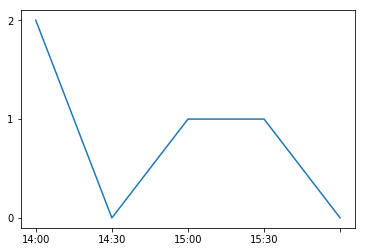

In [65]:
from matplotlib.ticker import MaxNLocator
# fig, ax = plt.subplots()

ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

ax.plot(xvals, yvals)